In [15]:
# Importar bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, accuracy_score, silhouette_score

In [16]:
# Paso 1: Cargar y limpiar datos
file_path = "/content/deporte.xlsx"
df = pd.read_excel(file_path)

In [17]:
# Eliminar valores nulos
df = df.dropna()

In [18]:
# Identificar columnas de texto
text_columns = df.select_dtypes(include=["object"]).columns

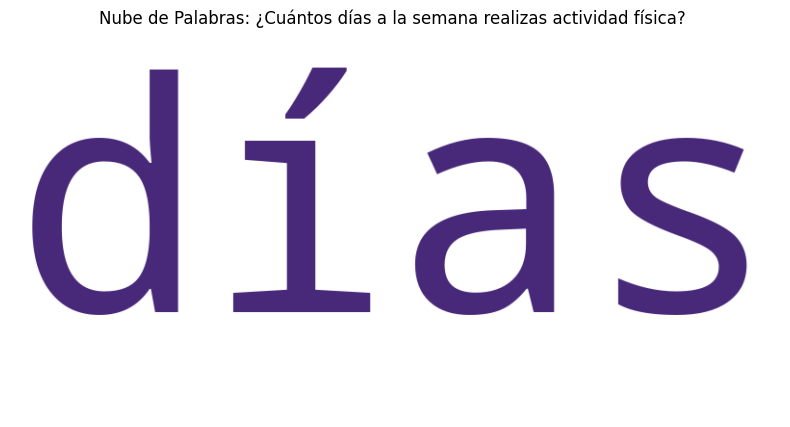

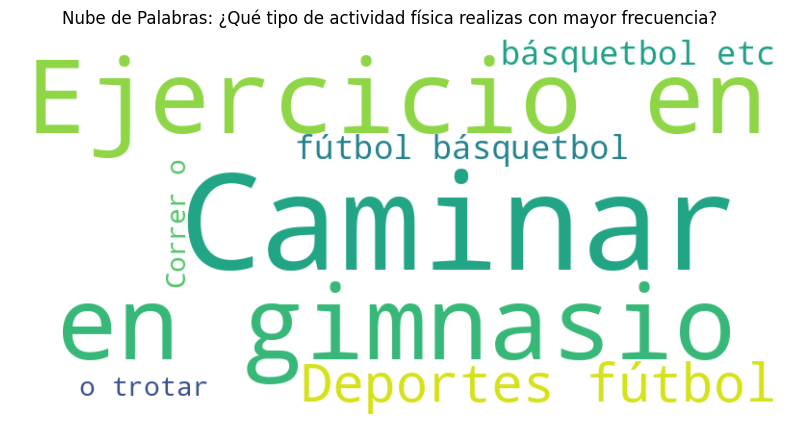

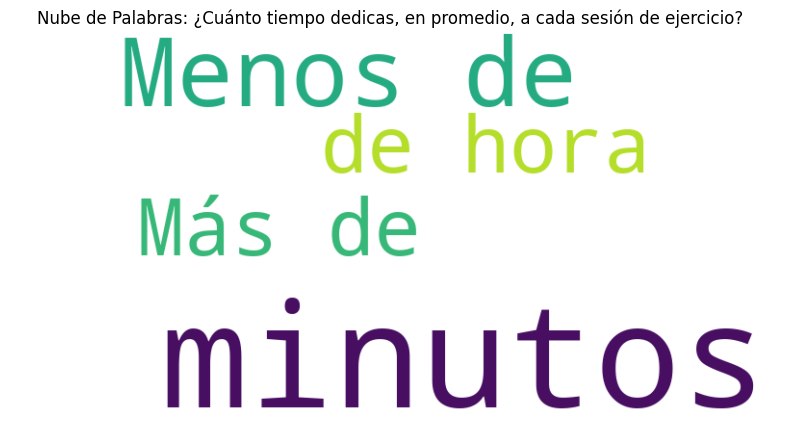

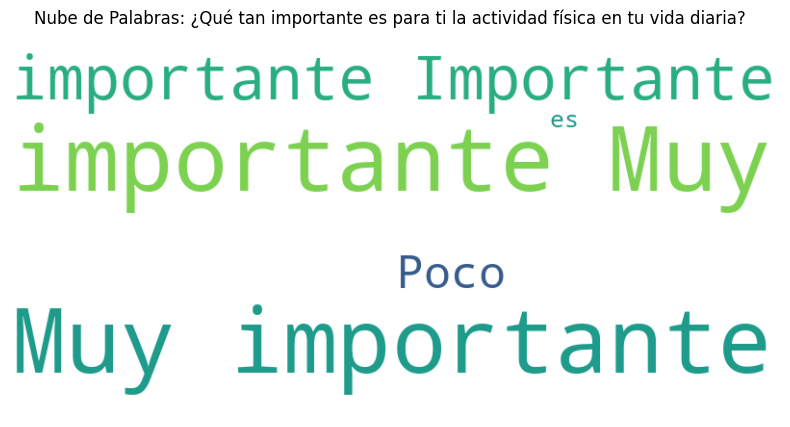

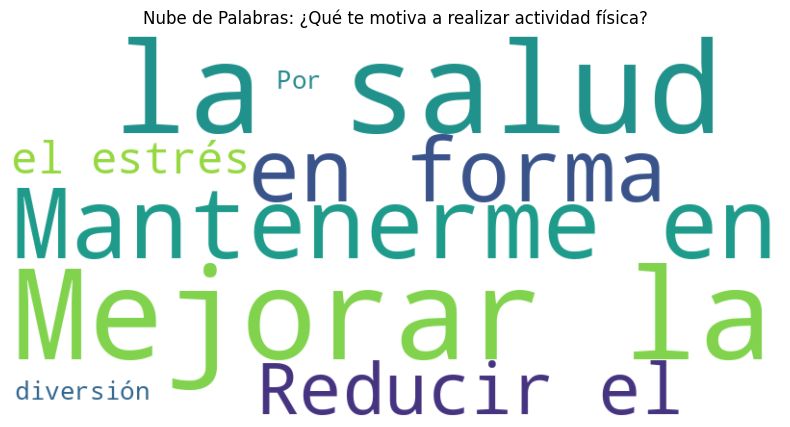

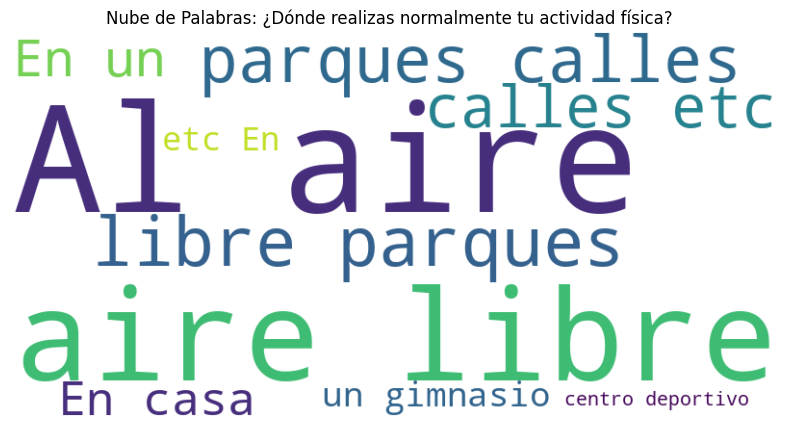

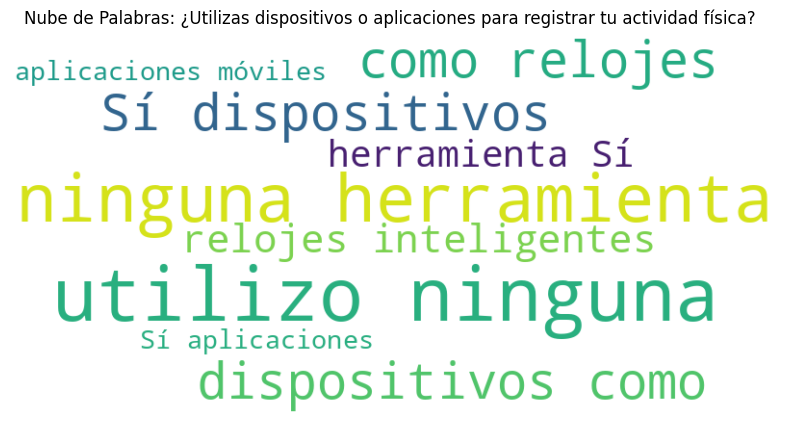

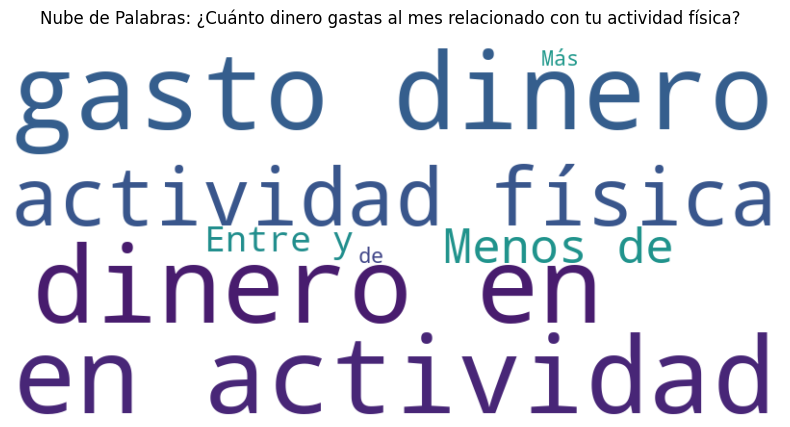

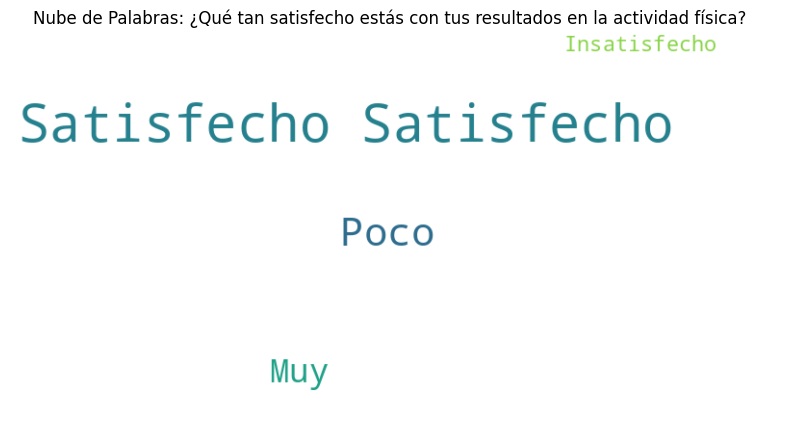

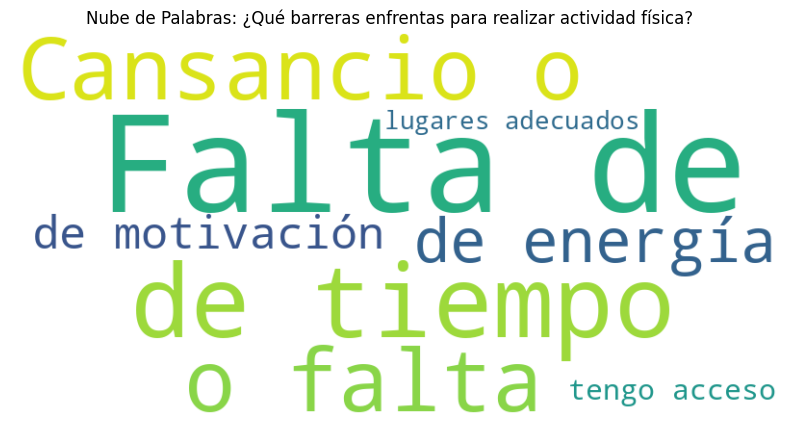

In [19]:
# Paso 2: Análisis Exploratorio de Datos (AED)
# Generar nubes de palabras
for col in text_columns:
    text_data = " ".join(df[col].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text_data)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f"Nube de Palabras: {col}")
    plt.axis("off")
    plt.show()

In [20]:
# Paso 3: Modelo de Agrupación (K-means)
# Convertir texto en representaciones numéricas (TF-IDF)
text_column = text_columns[0]
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df[text_column])

In [21]:
# Determinar el número óptimo de clústeres (Método del codo)
inertia = []
range_n_clusters = range(2, 10)
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_tfidf)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:

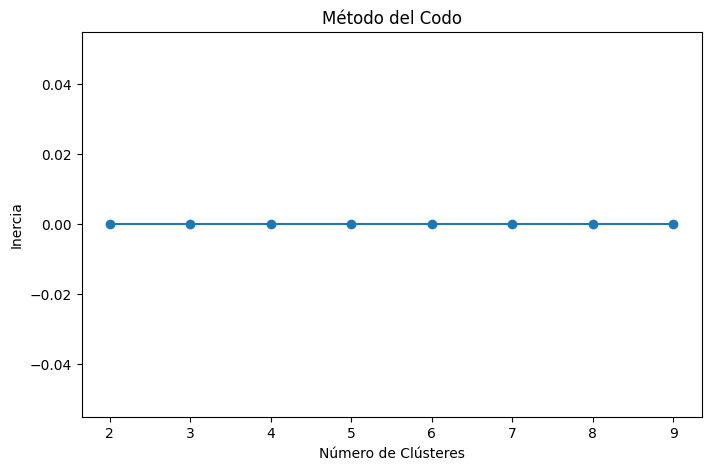

In [22]:
# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, inertia, marker="o")
plt.title("Método del Codo")
plt.xlabel("Número de Clústeres")
plt.ylabel("Inercia")
plt.show()

In [23]:
# Aplicar K-means con el número óptimo de clústeres
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_tfidf)

In [24]:
# Análisis de los clústeres
df["Cluster"] = cluster_labels
print("Distribución de datos en clústeres:")
print(df["Cluster"].value_counts())

Distribución de datos en clústeres:
Cluster
0    68
Name: count, dtype: int64


In [25]:
# Paso 4: Modelo de Clasificación (Naive Bayes)
# Crear etiquetas ficticias si no existen
if 'etiqueta' not in df.columns:
    import random
    df['etiqueta'] = [random.choice(['satisfecho', 'insatisfecho']) for _ in range(len(df))]

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['etiqueta'], test_size=0.2, random_state=42)

In [26]:
# Entrenar y evaluar modelo
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [27]:
# Reportar métricas
print("\nMétricas de Clasificación:")
print(classification_report(y_test, y_pred))
print(f"Precisión: {accuracy_score(y_test, y_pred)}")


Métricas de Clasificación:
              precision    recall  f1-score   support

insatisfecho       0.00      0.00      0.00         9
  satisfecho       0.36      1.00      0.53         5

    accuracy                           0.36        14
   macro avg       0.18      0.50      0.26        14
weighted avg       0.13      0.36      0.19        14

Precisión: 0.35714285714285715


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
